# EDA - Spotify Top Songs and Audio Features

The goals of this analysis are:
* Loading the data into a code environment and in a dataframe that can be manipulated
* Getting familiar with the data
* Basic preprocessing, checking for anomalous data or wrongly formatted data or NANs etc.
* First visualizations of the data and its distributions.
* Creating a new dataset that is indexed by artists and not by tracks and finding suitable ways to "average" the values across all the tracks from an artist.

Imports

In [18]:
#Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

In [19]:
# Load the dataset into a DataFrame
df = pd.read_csv('data.csv')

# Display the first few rows of the DataFrame
df.head(10)

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.000000,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.000000,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.000000,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.000000,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.000000,0.0755,0.688,-4.806,97.014,193507,30,301860377
5,00EPIEnX1JFjff8sC6bccd,"Thalia, NATTI NATASHA",No Me Acuerdo,Sony Music Latin,G,Minor,4 beats,0.836,0.799,0.0873,0.18700,0.000000,0.0920,0.772,-4.247,94.033,217653,16,98123727
6,00ETaeHUQ6lops3oWU1Wrt,"Kygo, Donna Summer",Hot Stuff,RCA Records Label,F,Major,4 beats,0.681,0.773,0.1480,0.01900,0.000001,0.1100,0.429,-5.749,119.961,199008,1,4569978
7,00ZKeP47bZtswtANkvxz2j,"Tropa do Bruxo, DJ Ws da Igrejinha, SMU, Triz,...",Baile do Bruxo,Tropa Do Bruxo,G,Minor,5 beats,0.734,0.228,0.5300,0.88900,0.006420,0.1020,0.522,-4.731,162.524,221538,3,27916960
8,00gpGR84M27moP7AFuqHIx,YBN Nahmir,Bounce Out With That,2018,G#/Ab,Major,4 beats,0.857,0.560,0.1730,0.04260,0.000000,0.1530,0.482,-8.278,94.949,91011,6,4913180
9,00imgaPlYRrMGn9o83hfmk,Brent Faiyaz,LOOSE CHANGE,"Lost Kids LLC., Marketed by Venice / Stem",C#/Db,Minor,4 beats,0.574,0.369,0.0814,0.75300,0.000000,0.1470,0.440,-8.931,84.975,226011,1,5854629


### Inspecting the data

We notice that we have some basic information about each songs, like for example the artist name, the track name, the record label, these identify a song and is information that is searched by the user. We also have other metrics like the mode (Major or Minor) and the key, time signature, duration of the song and tempo. These are the musical "stats" of a track. In addition we have some spotify platform specific data, the number of streams for each track, and the number of weeks that the data was on charts. 
What makes the dataset very interesting to us however, is the addition of these tasteful features about each track such as "danceability", "energy" and "valence" etc. These features are calculated by the author of the dataset, the code for the creation of the dataset can be viewed here: [github link to the dataset creation code](https://github.com/JulianoOrlandi/Spotify_Top_Songs_and_Audio_Features). We will be making full use of these highly unusual and fun features in our visualizations, but let us first define what is meant by each feature as they are not all self-evident.

* Danceability: How suitable a track is for dancing. (0.0 -> 1.0).
* Energy: A perceptual measure of intensity and activity (0.0 -> 1.0).
* Speechiness: The presence of spoken words in a track. (0.0 -> 1.0).
* Acousticness: A confidence measure of whether a track is acoustic (0.0 -> 1.0).
* Instrumentalness: Predicts whether a track contains no vocals (0.0 -> 1.0).
* Liveness: Detects the presence of an audience in the recording (0.0 -> 1.0).
* Valence: Describes how positive the track is conveyed to be (0.0 -> 1.0).
* Loudness: The overall loudness of the track in decibels (-34.5 -> 1.51).

Let's inspect the shape of this data

In [20]:
np.shape(df)

(6513, 19)

Indeed, there are 6513 different rows, indicating 6513 tracks, and 19 different columns, uniquely inded by the ID column. We would like to first check that there are actually 6513 distinct tracks, 

In [21]:
unique_tracks = df['track_name'].nunique()
print(f"Number of unique tracks: {unique_tracks}")

Number of unique tracks: 5351


As we might expect, there are fewer unique tracks than there are rows, suggesting the possibility for duplicate tracks. In practice this makes sense as some tracks share the same name but are different songs (for example "Afterglow" - by Ed Sheeran, and "Afterglow" - by Taylor Swift). We might similarly expect the same, or a vastly similar song to be "remixed" and published by multiple artists. Lastly, some artists will even re-release some of their older songs, an example of this is taylor swift's album "Fearless" - Taylor's version.

Let's see if there are any null values in the dataset.

In [22]:
df.isnull().sum()

id                  0
artist_names        0
track_name          0
source              0
key                 0
mode                0
time_signature      0
danceability        0
energy              0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
loudness            0
tempo               0
duration_ms         0
weeks_on_chart      0
streams             0
dtype: int64

We observe that there are no null values in the dataset which is nice to see!

Next we would like to start creating new dataframes from this raw dataframe so that it is more fit to be used for our purpose. To this end, we will need two separate dataframes, one that is indexed by artists, and one that is indexed by the tracks, as the one we have above already is what we are looking for, we will proceed by creating a dataframe that is indexed by the artists. 

Our approach for doing this will be as follows:
* We will split artist_names into artists, so that we have at most one artist per row. This will lead to some tracks being repeated, but that is fine.
* We will split the features into categorical features and continuous numerical columns (excluding weeks_on_chart and streams), and we will take the mean for the numerical features such as energy, on an artist to artist basis, and we will take the mode of the categorical features on an artist to artist basis. instead of averaging streams and weeks_on_charts, we think it is more suitable to aggregate and sum the streams.
* Finally we sort by the number of streams for each artist.

In [28]:
# Splitting artists and expanding the DataFrame to have one artist per row
df['artist'] = df['artist_names'].str.split(', ')
df_expanded = df.explode('artist')

# Drop the 'id' column and the original 'artist_names' column
df_expanded.drop(['id', 'artist_names'], axis=1, inplace=True)

# Update numerical columns list, excluding 'weeks_on_chart' and 'streams' for special treatment
numerical_cols = ['danceability', 'energy', 'speechiness', 'acousticness',
                  'instrumentalness', 'liveness', 'valence', 'loudness',
                  'tempo', 'duration_ms'] 

# Define categorical columns
categorical_cols = ['key', 'mode', 'time_signature']

# Update aggregation functions
aggregations = {**{col: 'mean' for col in numerical_cols},
                **{col: lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan for col in categorical_cols},
                'weeks_on_chart': 'sum',  # Summing weeks_on_chart
                'streams': 'sum'}  # Summing streams

# Performing the aggregation
artist_df = df_expanded.groupby('artist', as_index=False).agg(aggregations)

# Rename columns 'weeks_on_chart' and 'streams' for clarity
artist_df.rename(columns={'weeks_on_chart': 'weeks_on_chart_total', 'streams': 'total_streams'}, inplace=True)

# Sort the DataFrame by 'total_streams' in descending order
artist_df_sorted = artist_df.sort_values(by='total_streams', ascending=False)

artist_df_sorted.head(10)

,artist,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,key,mode,time_signature,weeks_on_chart_total,total_streams
172,Bad Bunny,0.749264,0.675874,0.123582,0.240423,0.012356,0.172444,0.497427,-5.591346,122.768327,214440.276730,C#/Db,Major,4 beats,2912,31355337608
1810,The Weeknd,0.612779,0.639500,0.097388,0.192148,0.007456,0.198514,0.389238,-6.732298,121.133731,220141.932692,C,Minor,4 beats,2243,21530493586
509,Drake,0.706118,0.544405,0.194416,0.201880,0.013069,0.200462,0.366806,-7.848524,118.929795,226178.131004,C#/Db,Major,4 beats,2436,20961364679
1462,Post Malone,0.633874,0.637225,0.081846,0.261542,0.005981,0.159996,0.393936,-5.367523,122.025838,194904.702703,C,Major,4 beats,2213,17775430798
1757,Taylor Swift,0.596606,0.577000,0.062285,0.307204,0.004629,0.139067,0.401780,-7.631493,123.227473,237324.142857,C,Major,4 beats,1545,17106209239
535,Ed Sheeran,0.672726,0.610749,0.092308,0.323409,0.000282,0.172138,0.534940,-6.035131,110.235393,217245.000000,G#/Ab,Major,4 beats,2080,16646366081
892,Justin Bieber,0.668372,0.587333,0.083179,0.276969,0.004377,0.148803,0.550290,-6.618321,122.068397,189779.294872,F#/Gb,Major,4 beats,1602,15666378558
772,J Balvin,0.750067,0.729067,0.128871,0.126857,0.008111,0.187484,0.647556,-4.684467,123.145311,215137.966667,A,Minor,4 beats,1891,14396444218
515,Dua Lipa,0.728800,0.722178,0.085451,0.064339,0.000172,0.143736,0.647844,-5.124644,116.704222,202467.600000,B,Minor,4 beats,1447,13890564424
128,Ariana Grande,0.657109,0.614119,0.101528,0.233330,0.000670,0.177766,0.472035,-6.133743,117.480604,191435.039604,C,Major,4 beats,1308,12850455403


Unsurprisingly, the more popular artists have the most number of streams. It would now be interesting to take the top 50 most popular artists and find the top 5 artitsts for each "interesting" feature. Let us proceed.

In [31]:
# Isolating the top 50 most popular artists
top_50_artists = artist_df_sorted.head(50)

# Define "interesting" features
interesting_features = ['danceability', 'energy', 'speechiness', 'acousticness', 
                        'instrumentalness', 'liveness', 'valence', 'loudness', 'tempo']

# Initialize a dictionary to hold the top 5 artists for each feature
top_5_artists_per_feature = {}

# For each feature, find the top 5 artists
for feature in interesting_features:
    top_5_artists = top_50_artists.nlargest(5, feature)[['artist', feature]]
    top_5_artists_per_feature[feature] = top_5_artists

# Now, top_5_artists_per_feature contains the top 5 artists for each interesting feature
# Let's display the results
for feature, top_5_df in top_5_artists_per_feature.items():
    print(f"Top 5 artists for {feature}:")
    print(top_5_df)
    print("\n---\n")

Top 5 artists for danceability:
           artist  danceability
305       Cardi B      0.837542
414        DaBaby      0.817590
1340  Nicki Minaj      0.795565
1977   Young Thug      0.793333
904       KAROL G      0.781964

---

Top 5 artists for energy:
            artist    energy
415   Daddy Yankee  0.802250
1439    Peso Pluma  0.743395
118       Anuel AA  0.734823
1403         Ozuna  0.733974
1180    Marshmello  0.730393

---

Top 5 artists for speechiness:
              artist  speechiness
563           Eminem     0.267535
414           DaBaby     0.251990
944   Kendrick Lamar     0.236410
8          21 Savage     0.227059
1340     Nicki Minaj     0.210558

---

Top 5 artists for acousticness:
              artist  acousticness
213    Billie Eilish      0.674056
1027   Lewis Capaldi      0.632300
1596       Sam Smith      0.467740
1383  Olivia Rodrigo      0.455837
1947    XXXTENTACION      0.402349

---

Top 5 artists for instrumentalness:
             artist  instrumentalness
2

Let's visualize this data!

C:\Users\Christopher\AppData\Local\Temp\ipykernel_302612\1380144436.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


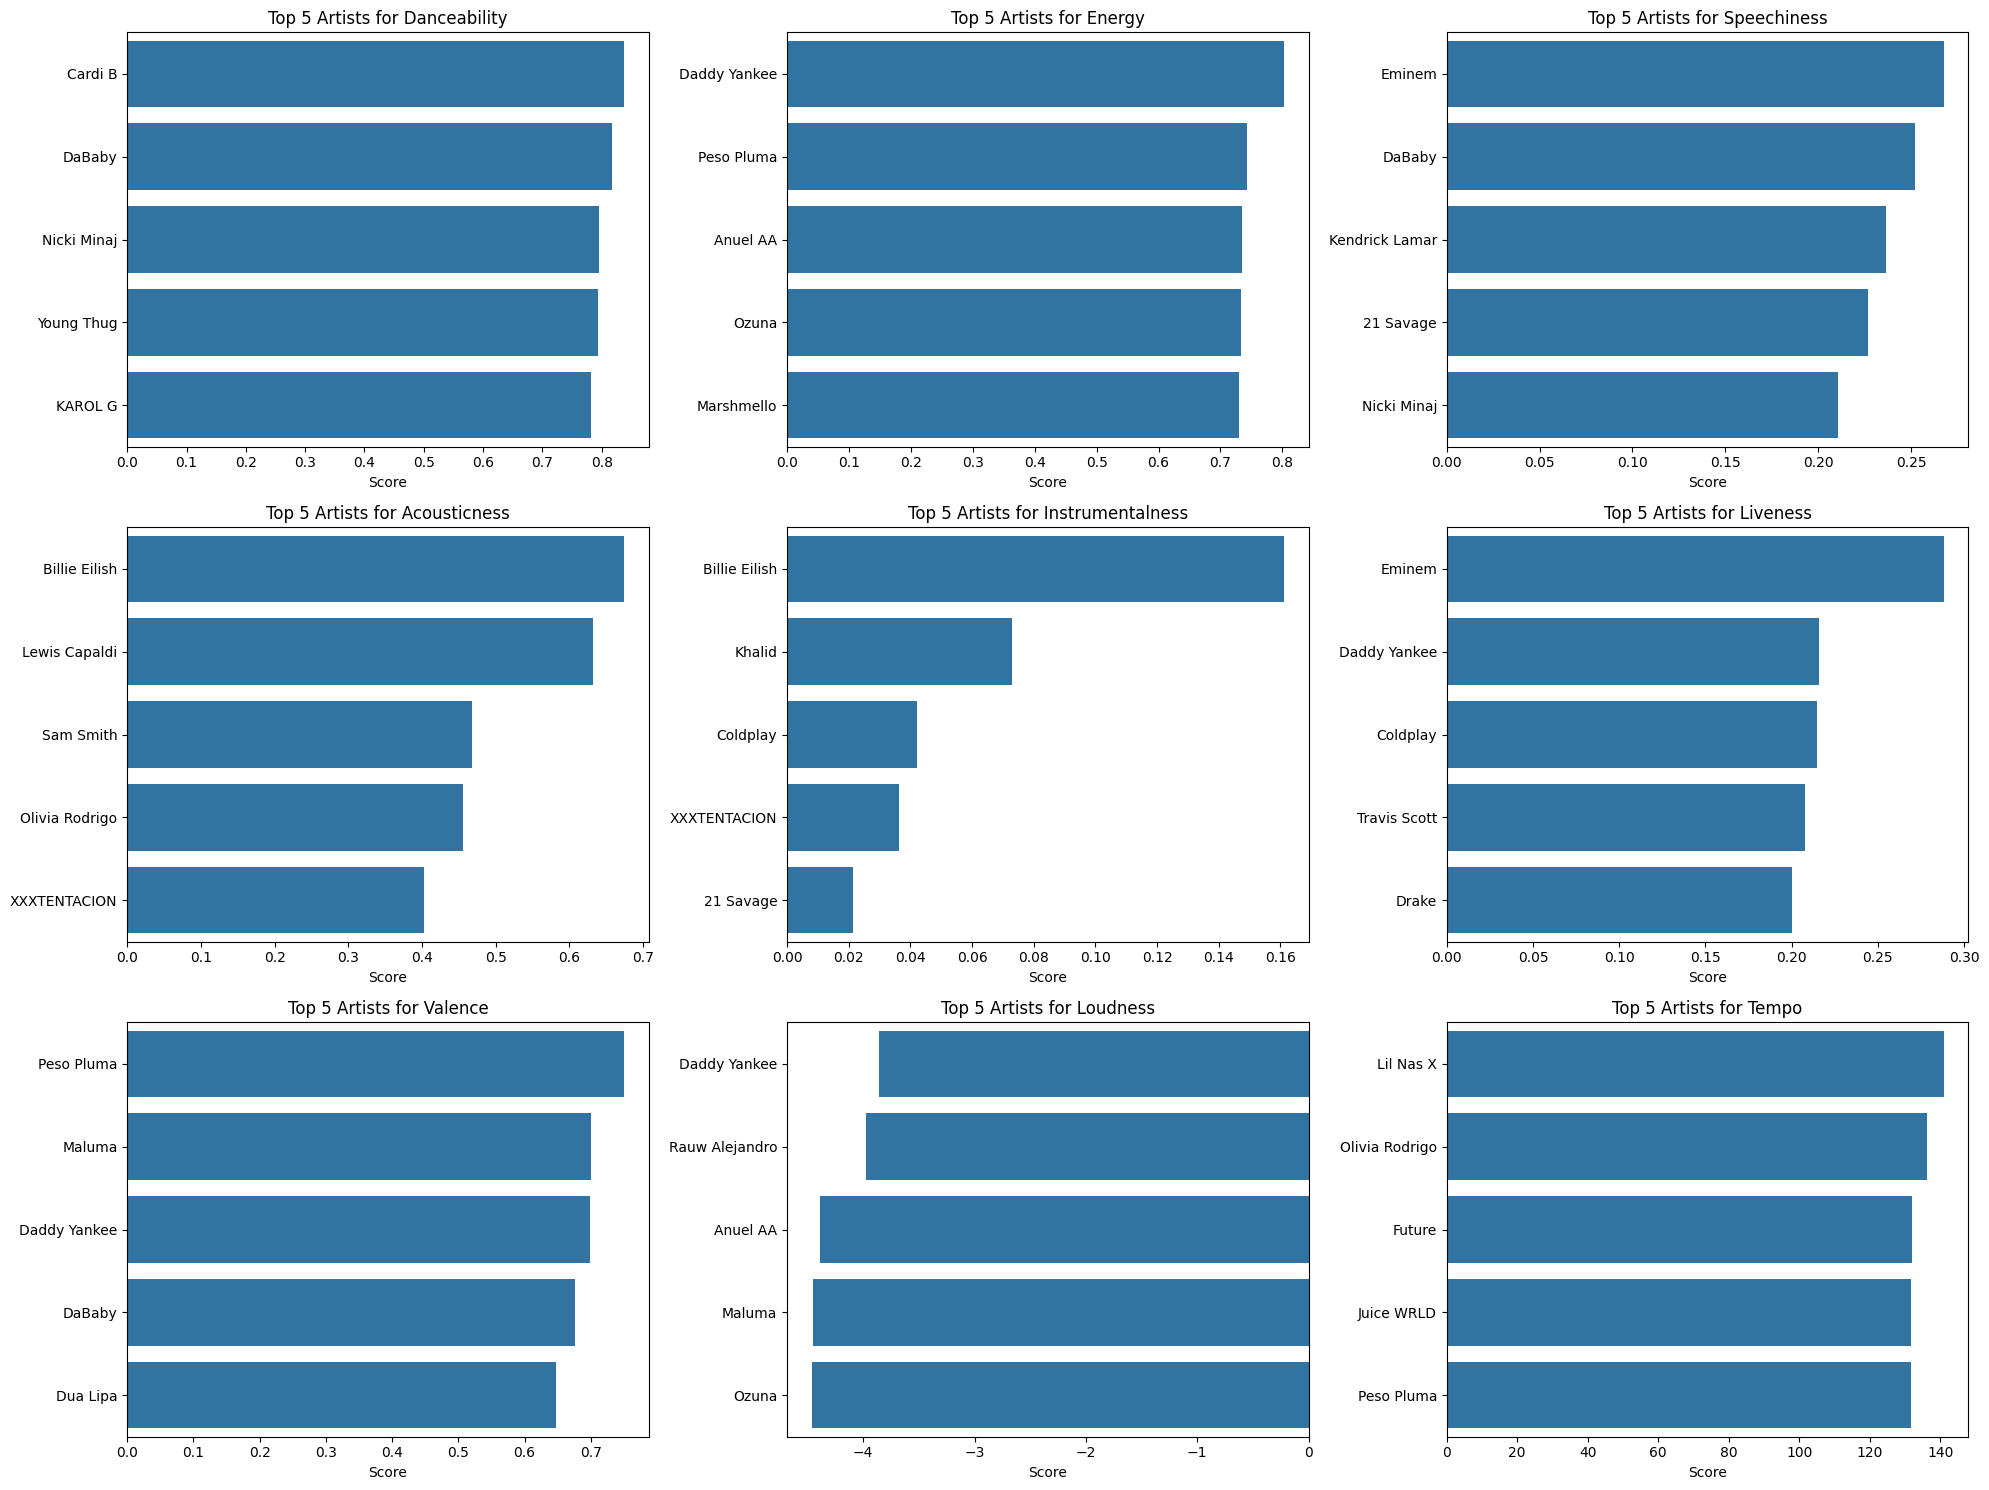

In [32]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15), constrained_layout=True)
axes = axes.flatten()

# Iterate over each interesting feature and its corresponding top 5 DataFrame
for i, (feature, top_5_df) in enumerate(top_5_artists_per_feature.items()):
    sns.barplot(x=feature, y='artist', data=top_5_df, ax=axes[i])
    axes[i].set_title(f'Top 5 Artists for {feature.capitalize()}')
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('')

#plot
plt.tight_layout()
plt.show()

Observing this data, we can kind of make sense of it, we would expect rappers like eminem to have the most"speechiness" in their songs on average. We would also expect the popular songs in the night club scene to appear on the "danceability" top 5. 